In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the dataset

In [2]:
data=pd.read_csv('./Project Datasets/Hacker_earth dataset/train.csv')

In [3]:
data.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


## Checking for ambiguous data entries

In [4]:
len(data[data['Selling_Price']<0])

14

## Removing ambiguous entries

In [5]:
data=data[data['Selling_Price']>=0]

## Checking for null values

In [6]:
data.isnull().sum()

Product_id            0
Stall_no              5
instock_date          0
Market_Category       0
Customer_name       206
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       37
charges_1           197
charges_2 (%)       204
Minimum_price        38
Maximum_price       340
Selling_Price         0
dtype: int64

## Replacing the nan with mean values 

In [7]:
#data.dropna(inplace=True)
data['Discount_avail'].fillna(data['Discount_avail'].mean(),inplace=True)
data['Minimum_price'].fillna(data['Minimum_price'].mean(),inplace=True)
data['Maximum_price'].fillna(data['Maximum_price'].mean(),inplace=True)


## Creating columns year, month and day 

In [8]:
year=[]
month=[]
day=[]
for i in range(len(data)):
    year.append(int(data['instock_date'].iloc[i][:4]))
    month.append(int(data['instock_date'].iloc[i][5:7]))
    day.append(int(data['instock_date'].iloc[i][8:10]))

data['year']=year
data['month']=month
data['day']=day

In [9]:
data.drop(['Product_id','Customer_name','instock_date'],axis=1,inplace=True)

## Converting categorical data into numercial data

In [10]:
data['Product_Category']=pd.Categorical(data['Product_Category'])
d1 = dict(enumerate(data['Product_Category'].cat.categories))
data['Product_Category']=data.Product_Category.cat.codes

data['Loyalty_customer']=pd.Categorical(data['Loyalty_customer'])
d2 = dict(enumerate(data['Loyalty_customer'].cat.categories))
data['Loyalty_customer']=data.Loyalty_customer.cat.codes

## Correlation matrix

In [11]:
data_corr=data.corr()

In [12]:
np.ones_like(data_corr, dtype=np.bool)
mask = np.triu(np.ones_like(data_corr, dtype=np.bool))


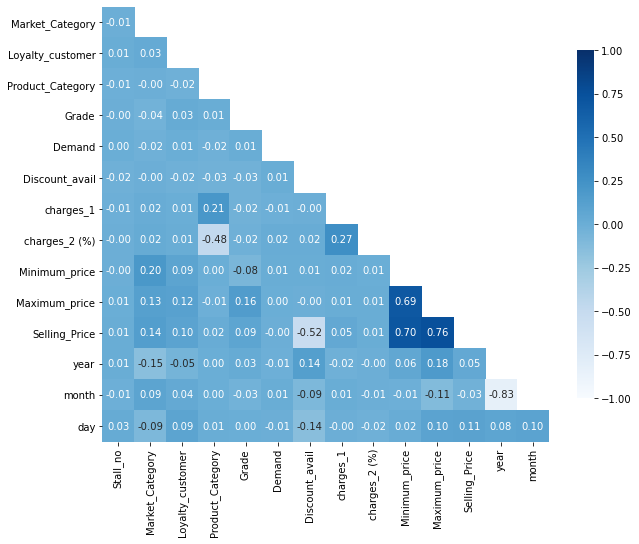

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))
# mask
mask = np.triu(np.ones_like(data_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = data_corr.iloc[1:,:-1].copy()
# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()

In [14]:
test_data=pd.read_csv('./Project Datasets/Hacker_earth dataset/test.csv')
test_data.isnull().sum()
test_data['Minimum_price'].fillna(test_data['Minimum_price'].mean(),inplace=True)
to_replace = {
    'Product_Category':{'Child_care':0,'Cosmetics':1,'Educational':2,'Fashion':3,'Home_decor':4,'Hospitality':5,'Organic':6,'Pet_care':7,'Repair':8,'Technology':9},
    'Loyalty_customer':{'No ':0,'Yes':1}
}
test_data.replace(to_replace,inplace=True)
year=[]
month=[]
day=[]
for i in range(len(test_data)):
    year.append(int(test_data['instock_date'].iloc[i][:4]))
    month.append(int(test_data['instock_date'].iloc[i][5:7]))
    day.append(int(test_data['instock_date'].iloc[i][8:10]))

test_data['year']=year
test_data['month']=month
test_data['day']=day
prod_id=test_data['Product_id']

# Multiple Linear regression

In [15]:
from sklearn import linear_model

In [16]:
y=data['Selling_Price']
X=data[['Market_Category','Discount_avail','Minimum_price','Maximum_price']]
regr = linear_model.LinearRegression()
regr.fit(X, y)
regr.score(X,y)

0.9063826939489834

In [17]:
regr.coef_

array([ 5.10905419e-02, -4.44288684e+03,  4.85080990e-01,  4.13534703e-01])

In [18]:
prediction=regr.predict(test_data[['Market_Category','Discount_avail','Minimum_price','Maximum_price']])

In [19]:
prediction=abs(prediction)

In [330]:
data_submission=pd.DataFrame({
    'Product_id': prod_id,
    'Selling_Price': prediction
})

# Random Forest Regression

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [30]:
cols=['Discount_avail', 'Minimum_price','Maximum_price','Market_Category', 'Product_Category', 'Grade',
       'Demand','day','month']
y=data['Selling_Price']
x=data[cols]


In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [32]:
forest = RandomForestRegressor(n_estimators=150, max_features="auto",verbose=2,oob_score=True)
forest.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.5s finished


RandomForestRegressor(n_estimators=150, oob_score=True, verbose=2)

In [33]:
preds = forest.predict(X_test)
print(forest.score(X_train, y_train), forest.score(X_test, y_test), forest.oob_score_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


0.9984652417573401 0.9927733923319181 0.9881025288566435


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


## Feature Importance

Feature ranking:
1. feature Maximum_price (0.560823)
2. feature Discount_avail (0.291884)
3. feature Minimum_price (0.139818)
4. feature Grade (0.002227)
5. feature Demand (0.001340)
6. feature Product_Category (0.001296)
7. feature day (0.001031)
8. feature Market_Category (0.001005)
9. feature month (0.000575)


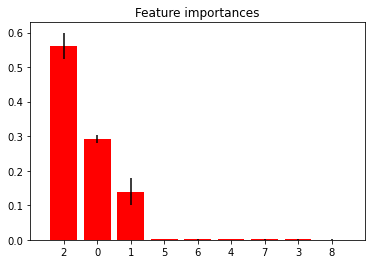

In [34]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, x.columns[indices[f]], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(x.shape[1]), indices)
plt.xlim([-1, x.shape[1]])
plt.show()

In [45]:
prediction_test=forest.predict(test_data[cols])

In [46]:
data_submission=pd.DataFrame({
    'Product_id': prod_id,
    'Selling_Price': prediction_test
})

In [47]:
data_submission.to_csv('Submission.csv',index=False)